# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)

lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

## Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")




Number of cities in the list: 603


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    
    response = requests.get(city_url).json()
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | riberalta
Processing Record 3 of Set 1 | ballina
Processing Record 4 of Set 1 | grand gaube
Processing Record 5 of Set 1 | letavertes
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | kazanskaya
Processing Record 13 of Set 1 | akyab
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | hearst
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | garden city
Processing Record 19 of Set 1 | maragogi
Processing Record 20 of Set 1 | port blair
Processing Record 21 of Set 1 | aklavik
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | po

Processing Record 36 of Set 4 | san cristobal
Processing Record 37 of Set 4 | banyo
Processing Record 38 of Set 4 | ilula
Processing Record 39 of Set 4 | rocha
Processing Record 40 of Set 4 | makakilo city
Processing Record 41 of Set 4 | qaanaaq
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | zhezkazgan
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | bathsheba
Processing Record 46 of Set 4 | kattivakkam
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | kamenskiy
Processing Record 49 of Set 4 | kandrian
Processing Record 0 of Set 5 | adrar
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | harrisburg
Processing Record 3 of Set 5 | fort saint james
Processing Record 4 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | saravan
Processing Record 7 of Set 5 | leningradskiy
Processing Record 8 of S

Processing Record 23 of Set 8 | pangai
Processing Record 24 of Set 8 | asau
Processing Record 25 of Set 8 | bojaya
City not found. Skipping...
Processing Record 26 of Set 8 | kalat
Processing Record 27 of Set 8 | comodoro rivadavia
Processing Record 28 of Set 8 | san francisco
Processing Record 29 of Set 8 | beaufort
Processing Record 30 of Set 8 | inuvik
Processing Record 31 of Set 8 | warrnambool
Processing Record 32 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 33 of Set 8 | farmington
Processing Record 34 of Set 8 | harper
Processing Record 35 of Set 8 | talnakh
Processing Record 36 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 8 | marawi
Processing Record 38 of Set 8 | morvi
Processing Record 39 of Set 8 | tuatapere
Processing Record 40 of Set 8 | poya
Processing Record 41 of Set 8 | benguela
Processing Record 42 of Set 8 | igrim
Processing Record 43 of Set 8 | sibolga
Processing Record 44 of Set 8 | ayan
Processing Record 45 of Se

Processing Record 10 of Set 12 | kirakira
Processing Record 11 of Set 12 | geraldton
Processing Record 12 of Set 12 | mandalgovi
Processing Record 13 of Set 12 | tavda
Processing Record 14 of Set 12 | mayya
Processing Record 15 of Set 12 | nouadhibou
Processing Record 16 of Set 12 | misratah
Processing Record 17 of Set 12 | trairi
Processing Record 18 of Set 12 | wau
Processing Record 19 of Set 12 | san borja
Processing Record 20 of Set 12 | bavly
Processing Record 21 of Set 12 | benjamin hill
Processing Record 22 of Set 12 | ambikapur
Processing Record 23 of Set 12 | pacific grove
Processing Record 24 of Set 12 | springbok
Processing Record 25 of Set 12 | ulladulla
Processing Record 26 of Set 12 | san felipe
Processing Record 27 of Set 12 | kloulklubed
Processing Record 28 of Set 12 | jining
Processing Record 29 of Set 12 | hualmay
Processing Record 30 of Set 12 | palauig
Processing Record 31 of Set 12 | dakar
Processing Record 32 of Set 12 | koslan
Processing Record 33 of Set 12 | cu

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame.from_dict(city_data)

# Adding a columnn for Celcius

city_data_df["Celsius"] = city_data_df["Max Temp"] - 273.15



In [6]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Celsius
0,georgetown,5.4112,100.3354,301.11,65,20,2.57,MY,1674180646,27.96
1,riberalta,-10.9833,-66.1000,295.40,89,97,0.96,BO,1674180653,22.25
2,ballina,-28.8667,153.5667,294.27,99,98,6.31,AU,1674180654,21.12
3,grand gaube,-20.0064,57.6608,298.36,83,100,2.24,MU,1674180654,25.21
4,letavertes,47.3833,21.9000,276.29,84,100,2.30,HU,1674180655,3.14


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

## Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Celsius
City_ID,,,,,,,,,,
0,georgetown,5.4112,100.3354,301.11,65,20,2.57,MY,1674180646,27.96
1,riberalta,-10.9833,-66.1000,295.40,89,97,0.96,BO,1674180653,22.25
2,ballina,-28.8667,153.5667,294.27,99,98,6.31,AU,1674180654,21.12
3,grand gaube,-20.0064,57.6608,298.36,83,100,2.24,MU,1674180654,25.21
4,letavertes,47.3833,21.9000,276.29,84,100,2.30,HU,1674180655,3.14


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

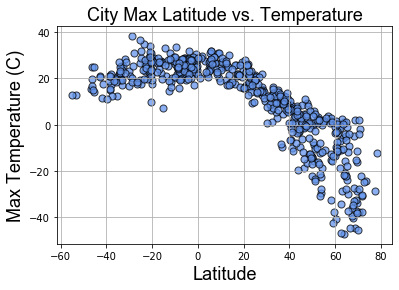

In [150]:
## Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Celsius"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black",
            s=50, alpha=0.75)

## Incorporate the other graph properties

plt.title("City Max Latitude vs. Temperature", fontname="arial", fontsize=18)
plt.xlabel("Latitude", fontname="arial", fontsize=18)
plt.ylabel("Max Temperature (C)", fontname="arial", fontsize=18)
plt.grid()

## Save the figure
plt.savefig("output_data/Fig1.png")

## Show plot
plt.show()

#### Latitude Vs. Humidity

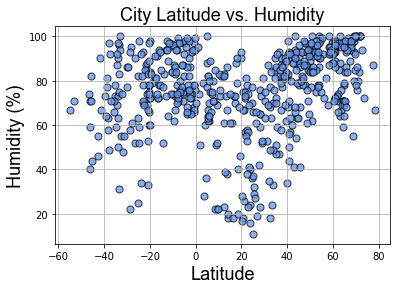

In [152]:
## Build scatter plot for latitude vs. Humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black",
            s=50, alpha=0.75)

## Incorporate the other graph properties

plt.title("City Latitude vs. Humidity", fontname="arial", fontsize=18)
plt.xlabel("Latitude", fontname="arial", fontsize=18)
plt.ylabel("Humidity (%)", fontname="arial", fontsize=18)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

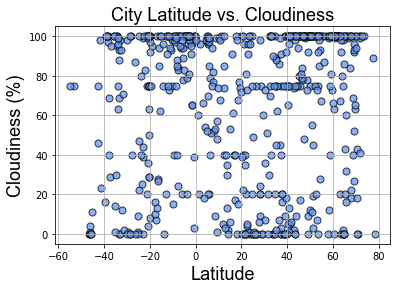

In [155]:
## Build scatter plot for latitude vs. Cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black",
            s=50, alpha=0.75)

## Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness", fontname="arial", fontsize=18)
plt.xlabel("Latitude", fontname="arial", fontsize=18)
plt.ylabel("Cloudiness (%)", fontname="arial", fontsize=18)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

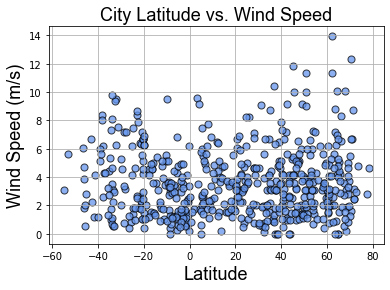

In [158]:
## Build scatter plot for latitude vs. Wind Speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="cornflowerblue", edgecolors="black",
            s=50, alpha=0.75)

## Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed", fontname="arial", fontsize=18)
plt.xlabel("Latitude", fontname="arial", fontsize=18)
plt.ylabel("Wind Speed (m/s)", fontname="arial", fontsize=18)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
## Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0] 

## Display sample data

northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Celsius
City_ID,,,,,,,,,,
0,georgetown,5.4112,100.3354,301.11,65,20,2.57,MY,1674180646,27.96
4,letavertes,47.3833,21.9000,276.29,84,100,2.30,HU,1674180655,3.14
6,fortuna,40.5982,-124.1573,280.74,89,100,2.06,US,1674180655,7.59
9,upernavik,72.7868,-56.1549,248.50,94,100,4.22,GL,1674180657,-24.65
10,iqaluit,63.7506,-68.5145,253.94,97,100,0.44,CA,1674180658,-19.21


In [31]:
## Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Celsius
City_ID,,,,,,,,,,
1,riberalta,-10.9833,-66.1000,295.40,89,97,0.96,BO,1674180653,22.25
2,ballina,-28.8667,153.5667,294.27,99,98,6.31,AU,1674180654,21.12
3,grand gaube,-20.0064,57.6608,298.36,83,100,2.24,MU,1674180654,25.21
5,saint-philippe,-21.3585,55.7679,297.92,91,90,5.58,RE,1674180655,24.77
7,castro,-24.7911,-50.0119,290.28,99,100,2.32,BR,1674180656,17.13


###  Temperature vs. Latitude Linear Regression Plot

The -r value is : -0.8526187643978065


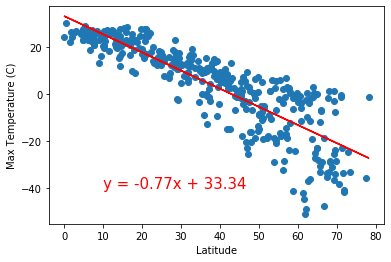

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Celsius"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy =(10,-40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
print(f"The -r value is : {rvalue}")
plt.show()

The -r value is : 0.36835264064587087


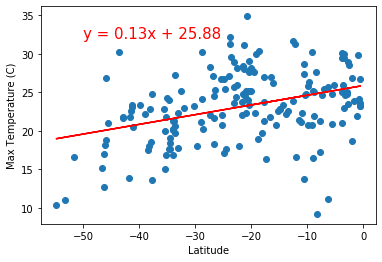

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Celsius"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy =(-50,32),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
print(f"The -r value is : {rvalue}")
plt.show()

# Discussion about the linear relationship: 

Linear regression on Northern Hemisphere shows a negative correlation of -0.86. Negative correlation is when increase in one variable results into a decrease in the other variable, ie. . Here we can see increase in the latitude (moving from center of the earth to north pole), results into a decrease in the temperature.  

Linear regression on Southern Hemisphere shows a positive correlation of 0.36. Positive correlation is when increase/decrease in one variable results into same effect on the other variable. Here we can see decrease in the latitude (moving from center of the earth to south pole), results into a decrease in the temperature.  

### Humidity vs. Latitude Linear Regression Plot

The -r value is : 0.459741770478686


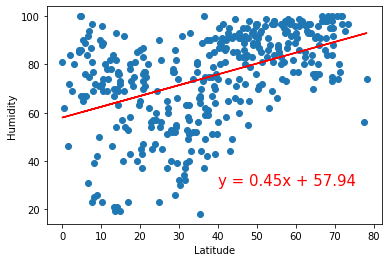

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy =(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The -r value is : {rvalue}")
plt.show()

The -r value is : 0.37812144228405226


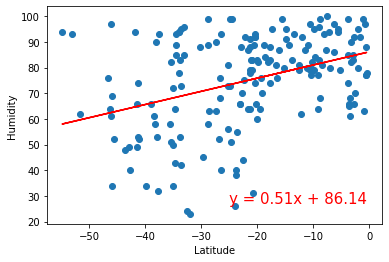

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy =(-25,27),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The -r value is : {rvalue}")
plt.show()

# Discussion about the linear relationship: 

Correlation between Latitude and Humidity for both the hemispheres have positive correlation. But since the Correlation coefficients magnitude is between 0.3 and 0.5 indicate variables which have a low correlation. This means that increase in latitude will not result into increase in humidity necessarily. 

### Cloudiness vs. Latitude Linear Regression Plot

The -r value is : 0.23063181050382756


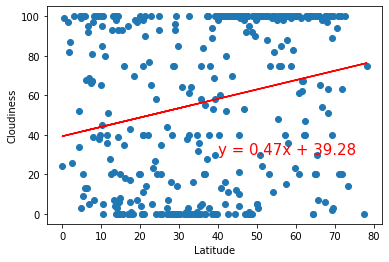

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy =(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The -r value is : {rvalue}")
plt.show()

The -r value is : 0.38633710227220647


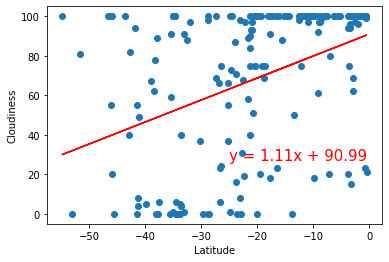

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy =(-25,27),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The -r value is : {rvalue}")
plt.show()

# Discussion about the linear relationship: 

Correlation between Latitude and Humidity for both the hemispheres have positive correlation. 

For Northern Hemisphere the Correlation coefficients magnitude is less than 0.3 which means there is very little or no linear correlation.

For Southern Hemisphere the Correlation coefficients magnitude is between 0.3 and 0.5 which indicate low correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The -r value is : -0.02790104386923103


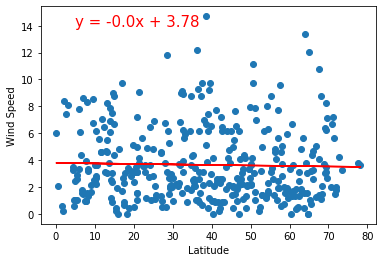

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy =(5,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The -r value is : {rvalue}")
plt.show()

The -r value is : -0.23981752842372797


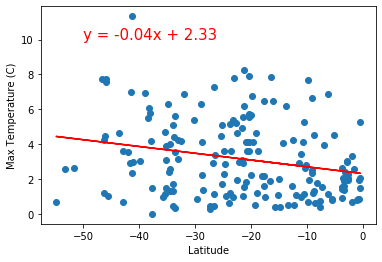

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy =(-50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
print(f"The -r value is : {rvalue}")
plt.show()

# **Discussion about the linear relationship:** YOUR RESPONSE HERE

Correlation between Latitude and Humidity for both the hemispheres have negative correlation. 

For Northern Hemisphere the Correlation coefficients magnitude is close to 0 and hence shows there is no linear correlation.

For Southern Hemisphere the Correlation coefficients is closer to 0 again signifying little linear correlation.